In [1]:
import numpy as np
import pandas as pd
import os
import sqlite3
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = create_connection(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()


In [6]:
write_db = 'Processed.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
conn_r.commit()
conn_r.close()

In [5]:
preprocessed_data.head()

,question,tags
0,chang cpu soni vaio pcg grx tri everywher find...,cpu motherboard sony-vaio replacement disassembly
1,display size grayscal qimag qt abl display ima...,c++ qt qt4
2,datagrid selecteditem set back null eventtocom...,mvvm silverlight-4.0
3,filter string collect base listview item resol...,c# winforms string listview collections
4,disabl home button without use type keyguard c...,android android-layout android-manifest androi...


In [8]:
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

In [17]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x = multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x))

In [16]:
total_qs

999999

In [19]:
questions_explained_fn(500)/total_qs

0.9002549002549003

In [20]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round((questions_explained_fn(i)/total_qs)*100,3))

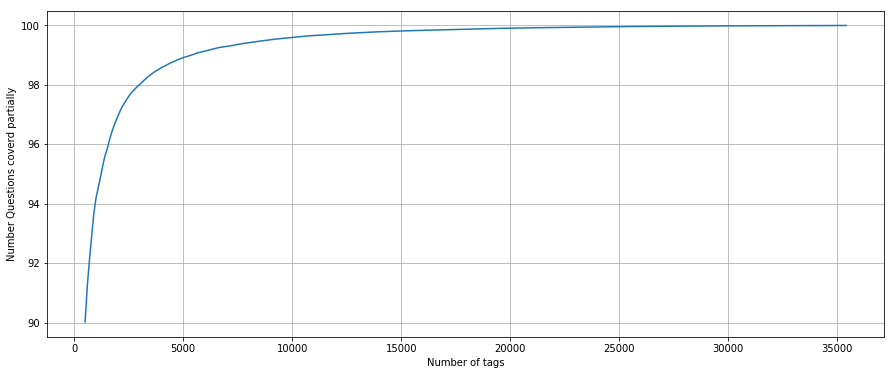

with  5500 tags we are covering  99.035 % of questions


In [34]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(range(500, total_tags, 100), questions_explained)
# ax.set_xticks(range(5500, 7000, 1500))
# xlabel = list(500+np.array(range(-50,450,50))*50)
# ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 500(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")

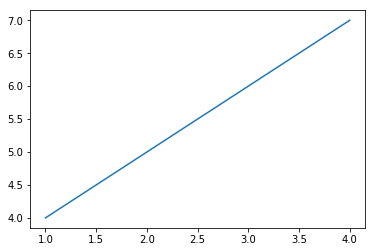

In [14]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4], [4,5,6,7])
# ax.set_xticklabels([1,2,3,4])

In [8]:
list(500+np.array(range(-50,450,50))*50)

[-2000, 500, 3000, 5500, 8000, 10500, 13000, 15500, 18000, 20500]

In [5]:
a = 'c c++ 213c# asp.net 12'
re.sub(r'[^A-Za-z+.#]', ' ', a).split()

['c', 'c++', 'c#', 'asp.net']

In [1]:
str([1,2,3])

'[1, 2, 3]'

In [3]:
df = pd.DataFrame()
df['a'] = [1,2,3,4]
df['b'] = [5,6,7,8]
df['c'] = [1,2,3,4]
df


,a,b,c
0,1,5,1
1,2,6,2
2,3,7,3
3,4,8,4


In [4]:
df.sum()

a    10
b    26
dtype: int64

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer(ngram_range=(1,3))
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.toarray())
print(X.toarray()[:,[2,4]])
print()
print(X)
print(X.sum(axis=0).tolist())
print(dict(zip(vectorizer.get_feature_names(), X.sum(axis=0).A1)))

['and', 'and this', 'and this is', 'document', 'document is', 'document is the', 'first', 'first document', 'is', 'is the', 'is the first', 'is the second', 'is the third', 'is this', 'is this the', 'one', 'second', 'second document', 'the', 'the first', 'the first document', 'the second', 'the second document', 'the third', 'the third one', 'third', 'third one', 'this', 'this document', 'this document is', 'this is', 'this is the', 'this the', 'this the first']
[[0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0]
 [0 0 0 2 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0]
 [1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0]
 [0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1]]
[[0 0]
 [0 1]
 [1 0]
 [0 0]]

  (0, 20)	1
  (0, 10)	1
  (0, 31)	1
  (0, 7)	1
  (0, 19)	1
  (0, 9)	1
  (0, 30)	1
  (0, 3)	1
  (0, 6)	1
  (0, 18)	1
  (0, 8)	1
  (0, 27)	1
  (1, 22)	1
  (1, 11)	1
  (1, 5)	1
  (1, 29)	1
  (1, 17)	1
  (1, 21)	1
  (1, 4)

In [36]:
df = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names())
df

,and,and this,and this is,document,document is,document is the,first,first document,is,is the,...,the third one,third,third one,this,this document,this document is,this is,this is the,this the,this the first
0,0,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,1,0,0
1,0,0,0,2,1,1,0,0,1,1,...,0,0,0,1,1,1,0,0,0,0
2,1,1,1,0,0,0,0,0,1,1,...,1,1,1,1,0,0,1,1,0,0
3,0,0,0,1,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,1,1


In [31]:
a = np.array([1,0,0,2,3,0,12,0,0])
np.count_nonzero(a==0)

5

In [23]:
xlabel = list(500+np.array(range(-50,450,50))*50)

In [24]:
xlabel

[-2000, 500, 3000, 5500, 8000, 10500, 13000, 15500, 18000, 20500]

In [11]:
t = X.sum(axis=0).tolist()[0]
sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
print(sorted_tags_i)
print(t)

[1, 3, 6, 8, 2, 0, 4, 5, 7]
[1, 4, 2, 4, 1, 1, 4, 1, 4]


In [12]:
np.argsort(t)[::-1]

array([8, 6, 3, 1, 2, 7, 5, 4, 0])

In [7]:
if os.path.isfile('train_no_dup.db'):
#     start = datetime.now()
    con = sqlite3.connect('train_no_dup.db')
    tag_data = pd.read_sql_query("""SELECT Tags FROM no_dup_train LIMIT 5""", con)
    #Always remember to close the database
    con.close()
    print(tag_data.head())

    # Let's now drop unwanted column.
    tag_data.drop(tag_data.index[0], inplace=True)
    #Printing first 5 columns from our data frame
    print(tag_data.head())
#     print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cells to genarate train.db file")

                                  Tags
0                                c++ c
1          c# silverlight data-binding
2  c# silverlight data-binding columns
3                             jsp jstl
4                            java jdbc
                                  Tags
1          c# silverlight data-binding
2  c# silverlight data-binding columns
3                             jsp jstl
4                            java jdbc


In [2]:
print('<code>\nsadlaksdk\nskad\n</code>czkclkkaskslk\n\n<code>\ndksda\nsdasdad\n</code>')

<code>
sadlaksdk
skad
</code>czkclkkaskslk

<code>
dksda
sdasdad
</code>


In [3]:
a = '<code>\nsadlaksdk\nskad\n</code>czkclkkaskslk\n\n<code>\ndksda\nsdasdad\n</code>'
# regex = re.compile('<code>(.*?)</code>')
re.sub(r'<code>(.*?)</code>','', a, flags=re.DOTALL|re.MULTILINE)

'czkclkkaskslk\n\n'

In [17]:
def cleanpunc(review): 
    cleanr = re.compile("[^a-zA-Z]+")
    cleaned = re.sub(cleanr, '', review)
    return  cleaned.strip()
test = 'czkclkkasks2lk\n\n'
print(cleanpunc(test))

czkclkkaskslk


In [5]:
import re
a = '<code>\nsadlaksdk\nskad\n</code>czkclkkaskslk\n\n<code>\ndksda\nsdasdad\n</code>'
# regex = re.compile('<code>(.*?)</code>')
str(re.findall(r'<code>(.*?)</code>', a, flags=re.DOTALL))

"['\\nsadlaksdk\\nskad\\n', '\\ndksda\\nsdasdad\\n']"

In [9]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext

In [12]:
striphtml("<p>Hello, <b>World</b>").split()

['Hello,', 'World']

In [17]:
strng = '10011001101'
re.findall('1.+?1',strng)

['1001', '1001', '101']

In [19]:
conn = sqlite3.connect('example.db')

In [20]:
a = [1,2,3]
a

[1, 2, 3]